# Metody Obliczeniowe w Nauce i Technice Laboratorium 2
## Rozwiazywanie układów równan liniowych
### Paweł Gorgolewski

## 1. Metoda Gaussa-Jordana

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import typing

In [5]:
def full_pivoting(A: np.array, B: np.array, min_id: int, curr_col_order: list):
    n = A.shape[0]
    max_row_id, max_col_id = np.unravel_index(np.abs(A[min_id:, min_id:]).argmax(), [n-min_id, n-min_id])
    max_row_id += min_id
    max_col_id += min_id

    if max_row_id != min_id:
        #lets, change rows
        A[[min_id, max_row_id]], B[[min_id, max_row_id]] = A[[max_row_id, min_id]], B[[max_row_id, min_id]]

    if max_col_id != min_id:
        #lets change cols
        A[:, [min_id, max_col_id]] = A[:, [max_col_id, min_id]]

    #scaling
    scaling_val = A[min_id, min_id]
    A[min_id] /= scaling_val
    B[min_id] /= scaling_val

    curr_col_order.append((min_id, max_col_id))

def gauss_jordan_full_pivoting(A: np.array, B: np.array):
    n = A.shape[0]
    if n < A.shape[1]:
        print("Too many unknows")
        return None

    A_copy, B_copy = np.copy(A), np.copy(B)
    permutations = list()
    for i in range(n):
        full_pivoting(A_copy, B_copy, i, permutations) #Reshape A i B to get the piwot at the top
        pivot = A_copy[i,i]
        for j in range(n):
            if j==i: 
                continue
            
            m = A_copy[j,i]/pivot
            A_copy[j] = np.subtract(A_copy[j], A_copy[i]*m)
            B_copy[j] = np.subtract(B_copy[j], B_copy[i]*m)

    for i in range(n):
        B_copy[i] /= A_copy[i,i]

    #Now we have results in B but without a proper order
    while permutations:
        i, j = permutations.pop()
        B_copy[[j, i]] = B_copy[[i, j]]

    return B_copy

In [6]:
def partial_piwoting(A: np.array, B: np.array, row_id: int):
    n = A.shape[0]
    max_row_id, max_col_id = np.unravel_index(np.abs(A[row_id:, row_id]).argmax(), [n-row_id, 1])
    max_row_id += row_id

    if max_row_id != row_id:
        #lets, change rows
        A[[row_id, max_row_id]], B[[row_id, max_row_id]] = A[[max_row_id, row_id]], B[[max_row_id, row_id]]

    #scaling
    scaling_val = A[row_id, row_id]
    A[row_id] /= scaling_val
    B[row_id] /= scaling_val

    return A,B

def gauss_jordan(A: np.array, B: np.array):
    n = A.shape[0]
    A_copy, B_copy = np.copy(A), np.copy(B)

    if n < A_copy.shape[1]:
        print("Too many unknows")
        return None

    for i in range(A.shape[1]):
        partial_piwoting(A_copy, B_copy, i) #Reshape A i B to get the piwot at the top
        pivot = A_copy[i,i]

        for j in range(i+1, n):
            #lets go w dół
            m = A_copy[j,i]/pivot
            A_copy[j] = np.subtract(A_copy[j], A_copy[i]*m)
            B_copy[j] = B_copy[j] - B_copy[i] * m

        for z in range(0, i):
            #lets go w górę
            m = A_copy[z,i]/pivot
            A_copy[z] = np.subtract(A_copy[z], A_copy[i]*m)
            B_copy[z] = B_copy[z] - B_copy[i] * m

    for i in range(n):
        B_copy[i] = B_copy[i]/A_copy[i,i]

    return B_copy

In [7]:
def test_gauss_jordan(size: int):
    np.random.seed(10)
    matrix = np.random.random((size, size))
    results = np.random.random((size, 1))
    time_res = dict()

    start = time.time()
    part = gauss_jordan(matrix, results)
    time_res["part"] = time.time() - start

    start = time.time()
    full = gauss_jordan_full_pivoting(matrix, results)
    time_res["full"] = time.time() - start

    start = time.time()
    res = np.linalg.solve(matrix, results)
    time_res["numpy"] = time.time() - start

    print(f"MATRIX SIZE: {size}")

    print(f"TIMES: partial_pivot: {time_res['part']}, full_pivot: {time_res['full']}, numpy_linalg_solve: {time_res['numpy']}")
    np.testing.assert_allclose(res, full)
    print(f"Full pivoting works fine with size")

    np.testing.assert_allclose(part, res)
    print(f"Partial pivoting works fine with size\n")

    return time_res

Sprawdzenie poprawności zarówno dla `partial_pivoting` jak i `full_pivoting` wraz z wykresem zależności czasu od wielkości macierzy:

In [8]:
result = dict()

for i in range(20):
    tested_size = 50 + 50*i
    result[tested_size] = test_gauss_jordan(tested_size)

MATRIX SIZE: 50
TIMES: partial_pivot: 0.01894855499267578, full_pivot: 0.018949270248413086, numpy_linalg_solve: 0.0060062408447265625
Full pivoting works fine with size
Partial pivoting works fine with size

MATRIX SIZE: 100
TIMES: partial_pivot: 0.06881546974182129, full_pivot: 0.07480072975158691, numpy_linalg_solve: 0.0
Full pivoting works fine with size
Partial pivoting works fine with size

MATRIX SIZE: 150
TIMES: partial_pivot: 0.1884908676147461, full_pivot: 0.17752695083618164, numpy_linalg_solve: 0.0029909610748291016
Full pivoting works fine with size
Partial pivoting works fine with size

MATRIX SIZE: 200
TIMES: partial_pivot: 0.34564208984375, full_pivot: 0.4577805995941162, numpy_linalg_solve: 0.0009975433349609375
Full pivoting works fine with size
Partial pivoting works fine with size

MATRIX SIZE: 250
TIMES: partial_pivot: 0.549649715423584, full_pivot: 0.5196385383605957, numpy_linalg_solve: 0.0009701251983642578
Full pivoting works fine with size
Partial pivoting wor

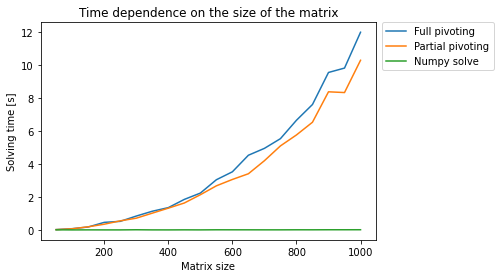

In [9]:
def create_time_plot(times):
    N = list(times.keys())

    full_piv = [times[n]['full'] for n in N]
    part_piv = [times[n]['part'] for n in N]
    numpy = [times[n]['numpy'] for n in N]

    plt.plot(N, full_piv)
    plt.plot(N, part_piv)
    plt.plot(N, numpy)
    plt.legend(['Full pivoting', 'Partial pivoting', 'Numpy solve'], bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.xlabel('Matrix size')
    plt.ylabel('Solving time [s]')
    plt.title(f"Time dependence on the size of the matrix")
    plt.show()

create_time_plot(result)

Wnioski:
1. Algorytm jest poprawny -> nie pojawił się żaden *AssertioError* podczas testowania
2. Poprzez zastosowanie operacji z biblioteki numpy, `full pivoting` jest tylko nieznacznie wolniejszy od `partial pivotingu`

## 2. Faktoryzacja LU

In [10]:
def LU_factorization(A: np.array):
    LU = np.zeros(A.shape)
    print(LU)

In [11]:
LU_factorization(np.random.random((3,3)))

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


# 3. Analiza obwodu elektrycznego - nadokreslony układ równan

Wstępnie ustalamy, że prąd płynie od s do t (czyli od pierwszego podanego wierzchołka do durgiego). W późniejszej częsci rozwiązania, należy odwrócic bieg prądu gdy na krawędzie pojawi się ujemne natężenie

Funkcja wczutująca dane z pliku:

In [2]:
import re
from collections import namedtuple
import networkx as nx

GraphInfo = namedtuple("Graph", ["nxDiGraph", "SEM"])
SEM = namedtuple('SEM', ['s', 't', 'U'])
def parse_graph_date(file_name='graphs.txt'):
    graphs = dict()
    with open(file_name) as f:
        iterator = iter(f.readlines())
        line = next(iterator, None)
        while line:
            name_match = re.match("\[(?P<graph_name>.*)]$", line)
            if name_match:
                graph_name = name_match.group('graph_name')
                #here without default None -> if file ends its an error cause we don't have data
                line = next(iterator)
                nx_graph = get_nx_graph(line)
                line = next(iterator)
                sem = get_sem(line)
                graphs[graph_name] = GraphInfo(nx_graph, sem)

            line = next(iterator, None)

    return graphs

def get_sem(line: str):
    s, t, U = line.strip().split(sep=';')
    return SEM(s, t, U)

def get_nx_graph(line: str):
    line = line.strip()
    edges_tuples = [eval(edge) for edge in line.split(sep=';')]

    G = nx.DiGraph()
    for edge in edges_tuples:
        G.add_edge(edge[0], edge[1], R=edge[2])

    return G

Obliczanie natężeń korzystając z praw Kirchhoffa. Ważne informacje:
1. Niewiadomymi są natężenia na poszczególnych krawędziach.
2. Indeks kolumny odpowiada indeksowi krawędzi
3. Rezultat każdego działania wynosi 0 zarówno dla I jak i II prawa Kirchhoffa
4. U = I*R

In [21]:
def kirchhoff(graph_info: GraphInfo):
    G = graph_info.nxDiGraph
    SEM = graph_info.SEM
    resistance = nx.get_edge_attributes(G,'R')

    edges_num = G.number_of_edges()
    nodes_num = G.number_of_nodes()
    edges = list(G.edges())
    edge_id_by_edge = {edges[i]: i for i in range(len(edges))}

    A = np.zeros((edges_num,edges_num))
    B = np.zeros(edges_num)

    # I prawo Kirchoffa da nam 'nodes_num' równań
    equations_num = 0
    for vertex in G.nodes():
        if equations_num >= edges_num:
            break

        #prąd wchodzi do wierzchołka, jest dodatni
        for from_vertex, _ in G.in_edges(vertex):
            edge_id = edge_id_by_edge.get((from_vertex, vertex))
            A[equations_num, edge_id] = 1

        for _, to_vertex in G.out_edges(vertex):
            edge_id = edge_id_by_edge.get((vertex, to_vertex))
            A[equations_num, edge_id] = -1

        equations_num += 1

    #II prawo kirchoffa
    cycles = nx.cycle_basis(G.to_undirected()) #rozpatrując cykle, nalezy patrzeć na graf jako nieskierowany
    cycles = sorted(cycles, key=len) # posortowane, żeby mieć więcej zer w równaniach :)
    while equations_num < edges_num and equations_num-nodes_num < len(cycles):
        print(equations_num, nodes_num)
        print(equations_num-nodes_num)
        cycle = cycles[equations_num-nodes_num]

        for i in range(len(cycle)-1):
            v1, v2 = cycle[i], cycle[i+1]
            if (v1, v2) == (SEM.s, SEM.t):
                B[equations_num] = SEM.U
            elif (v1, v2) == (SEM.t, SEM.s):
                B[equations_num] = -SEM.U
            else:
                if (v1, v2) in edge_id_by_edge:
                    edge_id = edge_id_by_edge[(v1, v2)]
                    R = resistance[(v1,v2)]
                else:
                    edge_id = edge_id_by_edge[(v2, v1)]
                    R = -resistance[(v2,v1)]

                A[equations_num, edge_id] = R

        equations_num += 1

    if equations_num + 1 != edges_num:
        print("ERROR: not enough equations")
        return None

    I = np.linalg.solve(A, B)
    print(I)





In [22]:
graphs = parse_graph_date()

In [23]:
kirchhoff(graphs['spojny'])

7 7
0
8 7
1
ERROR: not enough equations
